# Task 1P

### Overview

In 2012, Council and ARUP partnered with the University of Melbourne on a three year Australian Research Council Linkage Grant for Creating a Smart City through Internet of Things." The aim of the research was to develop new systems and algorithms that can help City administrators remotely monitor, understand and interpret real time information on urban environments" The researchers are now applying the research in the City by deploying a three month 'real-world' data collection and testing trial. The environmental sensors, measuring light levels, humidity and temperature, have been deployed at Fitzroy Gardens and Library at the Dock. The data collected will assist the Urban Landscapes branch to better understand and communicate the impact of canopy cover for urban cooling.[1]

**Import necessary libraries**

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Data Exploration

The data includes sensor readings with temperature, light, and humidity at 2 locations from 2014 to 2015. We have 21 features and 56570 records.

In [2]:
df = pd.read_csv("sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")
df

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,2015-01-05T16:45:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.4,3.4,3.4,...,61.4,61.4,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105111500,NaN,"-37.8199043, 144.9404851"
56566,2015-01-05T16:50:00+05:30,0013a20040b4b755,1,508,17.1,17.1,17.1,2.1,2.1,2.1,...,50.3,50.3,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20150105112000,NaN,"-37.8134078, 144.9794923"
56567,2015-01-05T16:55:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.5,3.5,3.5,...,62.5,62.5,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105112500,NaN,"-37.8199043, 144.9404851"
56568,2015-01-05T16:55:00+05:30,0013a20040b31571,1,510,17.1,17.1,17.1,1.3,1.3,1.3,...,54.1,54.1,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150105112500,NaN,"-37.8197121, 144.9413253"


From the preliminary observations we can see that except elevation and Position we do not have any null values in the dataset. I used info() of dataframe to get the null value count in each column as well as Dtype of the column. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

Another way to check the null values in dataframe is by using isnull() on dataframe with sum(), which returns the sum of all null values in each column.

In [4]:
df.isnull().sum()

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64

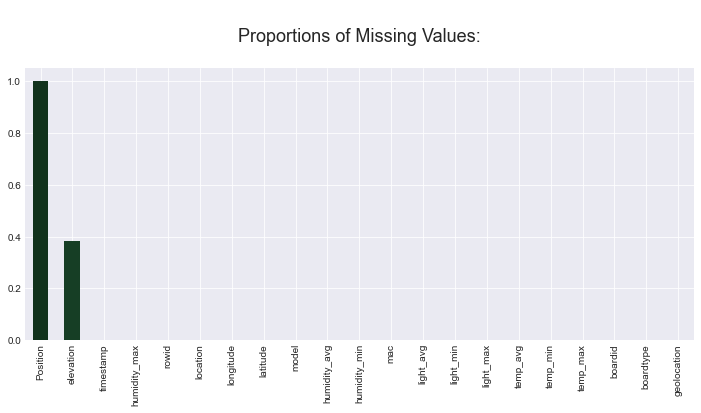

In [5]:
style.use('seaborn-darkgrid')

d = ((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
# Here we are plotting null values in range of 0-1. It means y axis range is 0-1.
# If bar graph show 0.5 null values that means there are 50% null values in that particular column.
# Hence we are dividing number of null values of each column with total number of rows i.e. 400 (or df.shape[0])

d.plot(kind = 'bar',
       color = sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(12,5))
plt.title("\nProportions of Missing Values:\n",fontsize=18)
plt.show()

___

As we already know the columns ***Position*** and ***elevation*** have missing values. Given that Position has all missing values and the other columns are already in the float64 data type, we will drop the Position column and impute the missing values in elevation. Since elevation is a float datatype, we can impute the missing values using either mean or median.

We will use the ***median*** to impute the missing values in elevation as it is ***less sensitive to outliers*** compared to the mean.

In [6]:
# Drop the column `Position`
df.drop(columns=['Position'], inplace=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='elevation', ylabel='Density'>

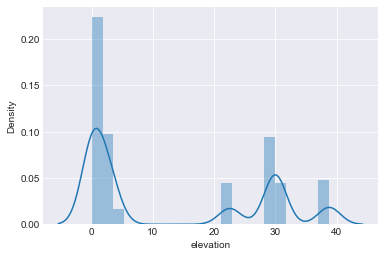

In [7]:
sns.distplot(df.elevation)

In [8]:
# Fill missing values in column elevation with the median of column elevation
elevation_median = pd.Series(df['elevation'].unique()).median()
df["elevation"].fillna(elevation_median, inplace=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='elevation', ylabel='Density'>

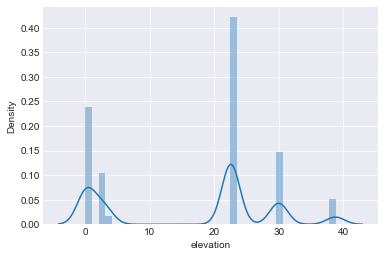

In [9]:
sns.distplot(df.elevation)

3. Use a histogram to show the distribution of the variable “location”. Explain the distribution and show how many locations are there in total.

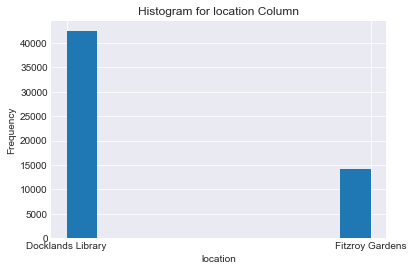

In [10]:
# Plotting Histogram for the 'location' column 
hist = df["location"].hist() 
  
# Adding title and labels 
plt.title("Histogram for location Column") 
plt.xlabel("location") 
plt.ylabel("Frequency") 
  
# Display the histogram 
plt.show()

____________________

In [11]:
# Encode the `location` column using one-hot encoding
df = pd.get_dummies(df, columns=["location"], prefix='', prefix_sep='')

df

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,rowid,geolocation,Docklands Library,Fitzroy Gardens
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,22.57,510-20150124104500,"-37.8197121, 144.9413253",1,0
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,22.57,511-20150124111500,"-37.8195002, 144.9418888",1,0
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,22.57,509-20150124111500,"-37.8199043, 144.9404851",1,0
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,22.57,509-20150124115500,"-37.8199043, 144.9404851",1,0
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,22.57,510-20150124115500,"-37.8197121, 144.9413253",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,2015-01-05T16:45:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.4,3.4,3.4,...,61.4,61.4,ENV,-37.819904,144.940485,22.57,509-20150105111500,"-37.8199043, 144.9404851",1,0
56566,2015-01-05T16:50:00+05:30,0013a20040b4b755,1,508,17.1,17.1,17.1,2.1,2.1,2.1,...,50.3,50.3,ENV,-37.813408,144.979492,30.10,508-20150105112000,"-37.8134078, 144.9794923",0,1
56567,2015-01-05T16:55:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.5,3.5,3.5,...,62.5,62.5,ENV,-37.819904,144.940485,22.57,509-20150105112500,"-37.8199043, 144.9404851",1,0
56568,2015-01-05T16:55:00+05:30,0013a20040b31571,1,510,17.1,17.1,17.1,1.3,1.3,1.3,...,54.1,54.1,ENV,-37.819712,144.941325,22.57,510-20150105112500,"-37.8197121, 144.9413253",1,0


The number of unique locations is 2. The distribution of locations is imbalanced, with 'Docklands Library' having significantly more observations than 'Fitzroy Gardens'.

I choose One-hot encoding because there are only two unique locations, and it avoids creating an artificial ordinal relationship between the categories.

___

5. Apply the min-max scaling on features "[boardtype, boardid ,temp_max, temp_min, temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max, humidity_avg]" . Plot distribution of first six features before and after scaling. Is there any difference? Please explain.

In [12]:
cols = ["boardtype", "boardid", "temp_max", "temp_min", "temp_avg", "light_max", "light_min", "light_avg", "humidity_min", "humidity_max", "humidity_avg"]
df_x = df[cols]
df_x

,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
0,1,510,19.4,19.4,19.4,0.9,0.9,0.9,52.7,52.7,52.7
1,1,511,19.7,19.7,19.7,10.6,10.6,10.6,50.2,50.2,50.2
2,1,509,19.7,19.7,19.7,3.1,3.1,3.1,57.9,57.9,57.9
3,1,509,19.7,19.7,19.7,3.1,3.1,3.1,53.7,53.7,53.7
4,1,510,18.7,18.7,18.7,1.0,1.0,1.0,48.6,48.6,48.6
...,...,...,...,...,...,...,...,...,...,...,...
56565,1,509,18.1,18.1,18.1,3.4,3.4,3.4,61.4,61.4,61.4
56566,1,508,17.1,17.1,17.1,2.1,2.1,2.1,50.3,50.3,50.3
56567,1,509,18.1,18.1,18.1,3.5,3.5,3.5,62.5,62.5,62.5
56568,1,510,17.1,17.1,17.1,1.3,1.3,1.3,54.1,54.1,54.1


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


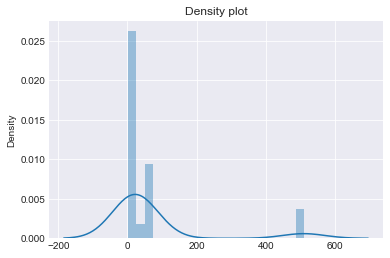

In [13]:
sns.distplot(df_x[:6])
plt.title("Density plot")
plt.show()

In [14]:
# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
df_x = scaler.fit_transform(df_x)
df_x = pd.DataFrame(df_x, columns=cols)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


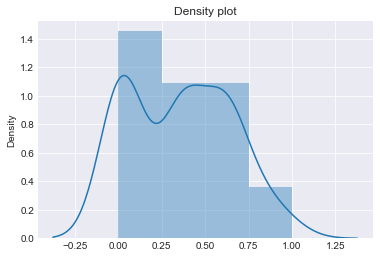

In [15]:
sns.distplot(df_x[:6])
plt.title("Density plot")
plt.show()

The distributions of the first six features before and after scaling are shown in histograms. The shapes of the distributions remain the same after scaling. However, the range of values changes. Before scaling, the features have different ranges, while after scaling, all features are within the range of 0 to 1. This is the intended effect of min-max scaling, which preserves the relative relationships between data points while transforming the values to a standard scale.

___

### References

1. https://discover.data.vic.gov.au/dataset/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-trial-2014-2015